# COGS108 - Final Project

## Overview

Our work looks at data from the midterm and general elections and compares metrics from both of elections to see if one can predict another. The majority of our work consisted of sourcing and aggregating our data, since it came from multiple sources. Next, we looked at the proportion of votes cast to particular candidates and their parties, comparing these proportions between the midterm and general elections. 

## Names

* Sruthi Vedantham
* Sreyas Narayanan
* Karissa Jacobsen 
* Saveree Joshipura

## Research Question

* Can the results of the presidential election be predicted through the results of the previous midterm election? Is the decision of the electoral college a good indicator for prediction? 

* How well does the electoral college represent the spread of Republicans/Democrats using primaries? 

* Can we determine how the electoral college will vote based on the spread of votes from the midterm elections? 


## Background and Prior Work

Every four years, citizens of the United States vote to elect their president. Halfway through this four year presidency term, midterm elections are held in which people vote for politicians in a part of the government called Congress - made up of the Senate and the House of Representatives - also known as America’s lawmakers. Congress can have a massive impact on what the president is able to accomplish based on whether or not control is held by the same party as that of the President or not. Because of this dynamic of power, it is interesting to see if the results of the midterm elections can reliably predict the winning party in the following general election for presidency. 

 Though there are many iterations of prediction models for US presidential elections, many of these models are based off of factors such as consecutive terms in office for a certain party, presidential approval rate, unemployment rate, etc. whereas we would like to take a deeper look at how well the electoral college represents the popular vote as well as well as how the latter can predict the former. A similar study is described in an article from Texas Tech University called “A Bayesian Model for the Prediction of United States Presidential Elections” wherein data from poll data accessed through the various websites was used as the chief source to predict election results and had success in predicting electoral college results. This study had an average 95% accuracy rate for 2008, 2012, and 2016 presidential elections. However, this model was unsuccessful in predicting 2016 election results according to the study because it failed to account for the date of polls and a lack of adapting to trends over time.
 
In another study “Modeling and forecasting US presidential election using learning algorithms” stepwise regression testing was used to determine the significance of the following factors: the number of consecutive terms the incumbent party has been in office, personal income, electoral votes of the incumbent party in the previous election, votes of the incumbent party in the last senate election, votes of the incumbent party in the last house of representatives election, the president’s approval rate, unemployment rate and the number of times that the 3-month GDP is above 3.2 within the previous 4 years. Of these, all variables except the president’s job approval rate were omitted. Because many of the above factors did not pass significance testing, and the success of the previously mentioned study based on polling data, we think that our model has the potential to predict the 2020 presidential election.


Study 1: https://www.siam.org/Portals/0/Publications/SIURO/Vol12/S01616.pdf?ver=2019-02-12-215230-620

Study 2: https://link.springer.com/article/10.1007/s40092-017-0238-2#Sec14

## Hypothesis

We should be able to see how the spread of superdelegates in the electoral college in the main election can predict the overall spread and winning party of the following midterm elections of the House of Representatives. We predict to see a correlation in the overall spread and ratio of the win, as well as also being able to predict the binary result of which party won in terms of both elections. For example, if the winning party in the main election won 62% of the superdelegates in the electoral college, we expect to see a similar percentage of House seats won in the midterm election two years later by the same party. 

## Dataset 1

Dataset Name: Party Divisions of the House of Representatives

Link to the Dataset: https://history.house.gov/Institution/Party-Divisions/Party-Divisions/

Number of Observations: 130 

Description: Electoral college dataset: formed by scraping 18 years worth of data off of website and then concatenating them together, Removed data that was not relevant to our analysis (vice-president votes) 



## Dataset 2

Dataset Name: Electoral College Results

Link to the Dataset: https://www.archives.gov/electoral-college/results?fbclid=IwAR3xewRfvComTf-98iWRK9TceYXEyJdh0_kMTPehagBZRx_b6OHwbhXo4BQ

Number of Observations: 956 

Description: Data from the Electoral College historic votes webpage, formed by scraping a table, and creating several separate dataframes for the different elections

## Setup / Data Cleaning

In our project, we analyzed two different datasets. One was data on the votes that were cast by the Electoral College and the other was data on votes that were cast by the House of Representatives. 
The first dataset, which contained data about the House of Representatives, was already formatted in a readable format, especially with the pandas read_csv package. There were a few problems with the pre-existing dataset. We converted all of the columns to integers, if they were encoded in strings. This would later enable us to perform visual analysis. Throughout the years, there has been a pro-administration, and an anti-administration. However, the names of these parties have changed (ex: Pro-Administration -> Federalists). We split the DataFrame into several smaller DataFrames, based on the names of the pro and anti administration parties. This results in 10 different DataFrames. 

The Electoral College (EC) dataset was created by scraping data from every year off of the Electoral College historic votes webpage. This data was not very clean. We scraped and cleaned a dataframe for every year, making sure to only take columns that were relevant to our work. This helped to make sure that every year’s dataframe had identical columns, which made it easy to concat the data-frames together. After scraping, we performed some feature engineering on the columns to aggregate winners per year and look at the proportion of Democrat/Republican wins. We also re-coded the categorical columns to include numerical values. For example, we turned values such as “Democrat” and “Republican” into 1’s and 0’s, which helped in aggregating values by year. In regards to preprocessing, we realized that each state gets a different number of delegates, which is based on the state’s population. To normalize our values, we gave each state one “vote”, which was whatever the majority of the delegates from that state had voted. We aggregated this vote by year to see who had won each year. 


# FIRST DATASET: Cleaning of Party Divisions of the House of Representatives

In [8]:
import pandas as pd
import numpy as np
from scipy import stats

In [27]:
#load first dataset  
df = pd.read_html("https://history.house.gov/Institution/Party-Divisions/Party-Divisions/")[0]
df.head()

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:852)>

In [ ]:
#convert all column values to integers, to enable visualization 
def convert_int(entry): 
    try: 
        entry = int(entry)
        return entry
    except: 
        return entry 
df['# of House Seats'] = df['# of House Seats'].apply(convert_int)
df['Pro-Administration'] = df['Pro-Administration'].apply(convert_int)
df['Anti-Administration'] = df['Anti-Administration'].apply(convert_int)
df['Other'] = df['Other'].apply(convert_int)
df['Del./Res.'] = df['Del./Res.'].apply(convert_int)

The following 10 DataFrames contain the same information, but the name of the third and fourth column (the two parties) changes with time.

In [50]:
house_total = []

In [156]:
df1 = df.loc[:2]
for i in range(len(df1['# of House Seats'])): 
    house_total.append((max(df1['Pro-Administration'][i],df1['Anti-Administration'][i])/df1['# of House Seats'][i]))
df2 = df[4:18].rename(columns={'Pro-Administration':'Federalists',
                        'Anti-Administration': 'Democratic Republicans'}).reset_index()
for i in range(len(df2['# of House Seats'])): 
    house_total.append(max(df2['Federalists'][i],df2['Democratic Republicans'][i])/df2['# of House Seats'][i])
df3 = df[19:20].rename(columns={'Pro-Administration':'Adams-Clay Republicans',
                        'Anti-Administration': 'Jackson Republicans'}).reset_index()
for i in range(len(df3['# of House Seats'])): 
    house_total.append(max(df3['Adams-Clay Republicans'][i],df3['Jackson Republicans'][i])/df3['# of House Seats'][i])
df4 = df.loc[21:22].rename(columns={'Pro-Administration':'Adams',
                        'Anti-Administration': 'Jacksons'}).reset_index() 
for i in range(len(df4['# of House Seats'])): 
    house_total.append(max(df4['Adams'][i],df4['Jacksons'][i])/df4['# of House Seats'][i])
df5 = df.loc[24:27].rename(columns={'Pro-Administration':'Anti-Jacksons',
                        'Anti-Administration': 'Jacksons'}).reset_index()
for i in range(len(df5['# of House Seats'])): 
    house_total.append(max(df5['Anti-Jacksons'][i],df5['Jacksons'][i])/df5['# of House Seats'][i])
df6 = df.loc[29:37].rename(columns={'Pro-Administration':'Democrats',
                        'Anti-Administration': 'Whigs'}).reset_index()
for i in range(len(df6['# of House Seats'])): 
    house_total.append(max(df6['Democrats'][i],df6['Whigs'][i])/df6['# of House Seats'][i])
df7 = df.loc[29:37].rename(columns={'Pro-Administration':'Democrats',
                        'Anti-Administration': 'Whigs'}).reset_index()
for i in range(len(df7['# of House Seats'])): 
    house_total.append(max(df7['Democrats'][i],df7['Whigs'][i])/df7['# of House Seats'][i])
df8 = df.loc[39:39].rename(columns={'Pro-Administration':'Democrats',
                        'Anti-Administration': 'Oppositions'}).reset_index()
for i in range(len(df8['# of House Seats'])): 
    house_total.append(max(df8['Democrats'][i],df8['Oppositions'][i])/df8['# of House Seats'][i])
df9 = df.loc[41:50].rename(columns={'Pro-Administration':'Democrats',
                        'Anti-Administration': 'Republicans'}).reset_index()
for i in range(len(df9['# of House Seats'])): 
    house_total.append(max(df9['Democrats'][i],df9['Republicans'][i])/df9['# of House Seats'][i])
df10 = df.loc[41:].rename(columns={'Pro-Administration':'Democrats',
                        'Anti-Administration': 'Republicans'})
dropindex = df10[df10['Congress (Years)'].str.contains('Congress')].index
df10 = df10.drop(dropindex).reset_index()
for i in range(len(df10['# of House Seats'])): 
    house_total.append(max(df10['Democrats'][i],df10['Republicans'][i])/df10['# of House Seats'][i])
house_total[:4]

[0.5692307692307692,
 0.5652173913043478,
 0.5142857142857142,
 0.5692307692307692]

# Visualizations

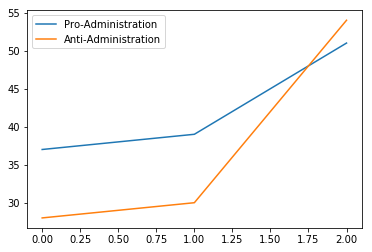

In [157]:
df1[['Pro-Administration','Anti-Administration']].plot()

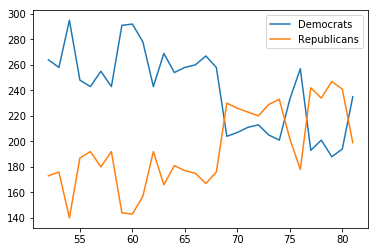

In [158]:
df10[['Democrats','Republicans']].loc[52:].plot()

The first plot shows the rise of Anti-Administration in the first few years (1789-1795). The second plot shows the alternating nature of house wins between both parties. There has been multiple majority changes within the house.

The following visualization shows the proportion of the winning parties in clinching house seats from the years 1789-2021. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23f06518>]],
      dtype=object)

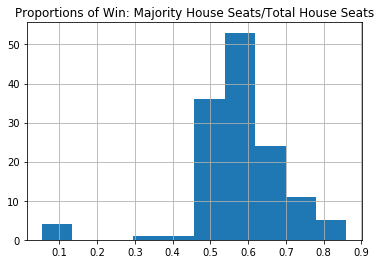

In [29]:
plot = pd.DataFrame({'year': np.arange(len(house_total)),
                    'Proportions of Win: Majority House Seats/Total House Seats':house_total})
plot.hist('Proportions of Win: Majority House Seats/Total House Seats')

Distribution: There is a large right-skew, as the majority party was able to get bigger wins at a certain point because the American political system started to become one of two main parties. Later, however, we can see the decline in this nature, as there starts to form an anti-adminstration sentiment. 

In [30]:
plot[(plot['Proportions of Win: Majority House Seats/Total House Seats'] > 0.75)|
    (plot['Proportions of Win: Majority House Seats/Total House Seats'] < 0.40)]

,year,Proportions of Win: Majority House Seats/Total House Seats
8,8,0.802817
9,9,0.816901
14,14,0.789189
15,15,0.860215
16,16,0.828877
17,17,0.338028
48,48,0.076515
58,58,0.076515
93,93,0.767816
104,104,0.064634


Outliers: We have defined the outliers above to be proportions that are either above 75% or below 40%. This indicates that there is either a super-majority in the house, or the presence of a third party that allowed the winning party to have a smaller win. 

Relationship Between Variables: Year indicates the two year term in Congress, starting with 1789, and ending at 2021. Proportions of Win indicates the quotient of the majority house seats and the total house seats.

# SECOND DATASET 

In [12]:
df2 = pd.read_csv('ElectoralCollegeVotesbyStatesandYears.csv')
df2.head()

,Unnamed: 0,State,Electoral Vote of Each State,Democrat,Republican,Year
0,0,Alabama,11,11,0,1944
1,1,Arizona,4,4,0,1944
2,2,Arkansas,9,9,0,1944
3,3,California,25,25,0,1944
4,4,Colorado,6,0,6,1944


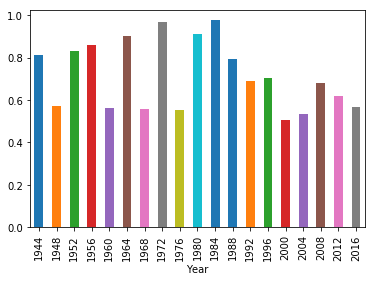

In [26]:
def is_dem(row):
    if row['Democrat'] > row['Republican']:
        return 1
    else:
        return 0
    
def is_repub(row):
    if row['Democrat'] > row['Republican']:
        return 0
    else:
        return 1

df2['Is Democrat'] = df2.apply(lambda x: is_dem(x), axis=1)
df2['Is Republican'] = df2.apply(lambda x: is_repub(x), axis=1)
winners1 = ['Democrat', 'Democrat', 'Republican', 'Republican', 'Democrat', 'Democrat', 'Democrat', 'Republican', 'Republican', 'Republican', 'Democrat', 'Republican', 'Republican', 'Democrat', 'Democrat', 'Republican', 'Republican', 'Democrat', 'Democrat', 'Republican']
count = 0
winners2 = []
for i in range(len(df2['Year'])):
    idx = list(df2['Year'])[i] - 1944
    idx = int(idx/4)
    winners2.append(winners1[idx])
df2['Winners'] = winners2
denom = df2.groupby('Year').sum()['Electoral Vote of Each State']
numerator = df2.groupby('Year').sum()
numerator = numerator.apply(lambda x: x['Democrat'] if x['Democrat'] > x['Republican'] else x['Republican'], axis = 1)
electoral_college_spread = numerator/denom
electoral_college_spread.plot(kind='bar')

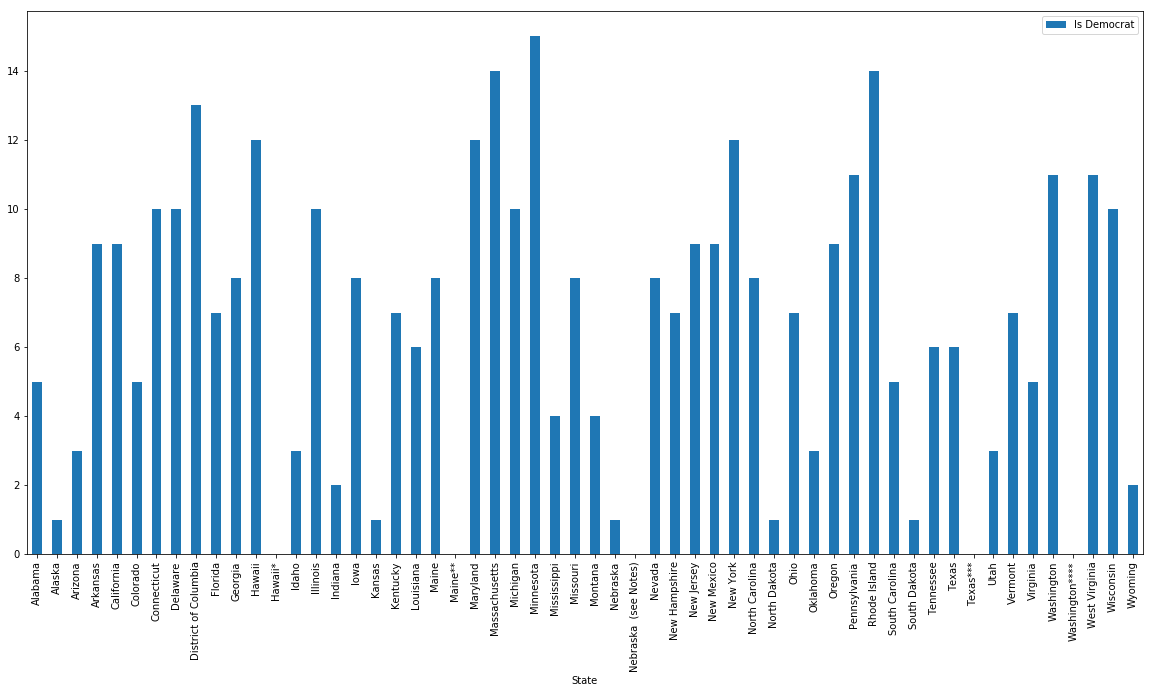

In [24]:
bar_plot1 = pd.DataFrame(df2.groupby('State')['Is Democrat'].sum()).plot(kind='bar',figsize=(20,10))

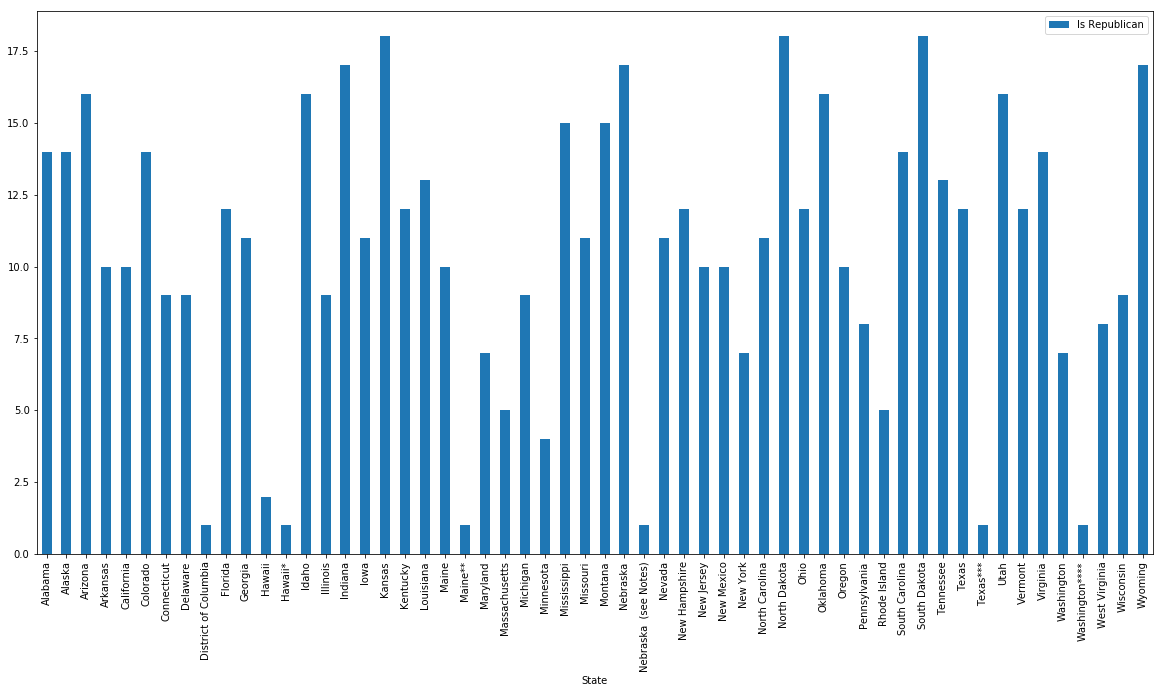

In [25]:
pd.DataFrame(df2.groupby('State')['Is Republican'].sum()).plot(kind='bar',figsize=(20,10))

Our first graph illustrates the percentage of electoral votes won by the winning party for that year. We decided to graph this metric in order to compare it to the votes that the winning party recieved during the midterm elections. From the graph we can see that while there were some years with a very clear majority, there were other years (such as the 2000 election) that barely recieved the requisite 50% of electoral college votes. 

Our two other graphs illustrate the distribution of each state voting for the Democrat or Republican candidate. Through these graphs we can see how certain states clearly vote for Republicans or Democrats. We can also isolate swing states by looking at whether at state has similar proportions in both graphs.

In [19]:
electoral_years = list(electoral_college_spread.keys())
house_years = []
for i in electoral_years: 
    house_years.append(i-3)

In [20]:
electoral_college_winners = []
for i in range(len(df2['Winners'])): 
    if df2['Winners'][i] == "Democrat": 
        electoral_college_winners.append(1)
    else:
        electoral_college_winners.append(0)
df2['Winners Binary'] = electoral_college_winners
electoral_winners = df2.groupby('Year').agg(lambda x: x.value_counts().index[0])['Winners Binary']

In [22]:
proportions = []
winners_house = []
for i in house_years: 
    curr_df = df[(df['Congress (Years)'].str.contains(str(i))) & 
                (df['Congress (Years)'].str.contains(str(i+2)))].reset_index()
    
    for j in range(len(curr_df['# of House Seats'])): 
        proportions.append((max(curr_df['Pro-Administration'][j],curr_df['Anti-Administration'][j])/curr_df['# of House Seats'][j]))
        if curr_df['Pro-Administration'][j] > curr_df['Anti-Administration'][j]:
            winners_house.append(1)
        else: 
            winners_house.append(0)

KeyError: 'Congress (Years)'

In [175]:
house_spread = pd.Series(proportions, house_years)
house_winners = pd.Series(winners_house, house_years)

In [1]:
house_spread.plot(kind='bar')

NameError: name 'house_spread' is not defined

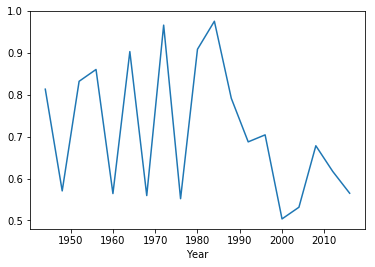

In [177]:
electoral_college_spread.plot()

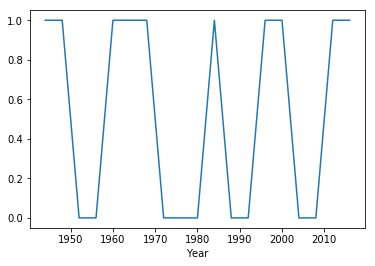

In [178]:
electoral_winners.plot()

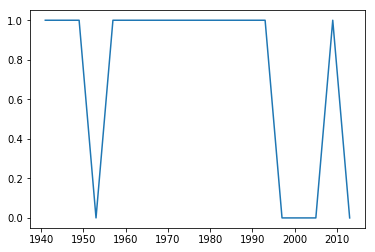

In [180]:
house_winners.plot()

Does the midterm election predict general election

In [193]:
acc = 0
for i in range(len(electoral_winners.values)): 
    if electoral_winners.values[i] == house_winners.values[i]:
        acc+=1
acc/len(electoral_winners.values)

0.5789473684210527

Does the midterm election predict the next general eelection 

In [194]:
acc = 0
for i in range(len(electoral_winners.values)-1): 
    if electoral_winners.values[i]== house_winners.values[i+1]:
        acc+=1
acc/len(electoral_winners.values)

0.42105263157894735

## Data Analysis & Results 

* What distributions do your variables take? 
    * There is a lot of variance in terms of general election results, while the midterm elections were more prone to reelections. There is a similar overall shape of the graphs of the results of the midterm elections and general elections since 1944, with more fluctuations visually seen in between in terms of House results. Overall, we first compared the spread of the superdelegate vote with the House midterm spread throughout the country based on the winning party. Afterwards, we compared the binary result of the winning party in both elections and found more of a trend in the graphs in terms of historical progression of the party in power but not too close of a correlational relationship.
    
* Are there any outliers? 
    * Our dataset including results from midterm elections were dated from 1789 and so had political parties including Whig, Federalist etc. Since these could not necessarily be directly compared to Democratic vs Republican distributions, we are considering these as outliers and are not using election results from these earlier years.


* Relationship between variables: 
    * We saw a very low correlation between midterm and general election results with a prediction rate of only 57%. We can not effectively predict the midterm election results or the spread of House Seats based on the superdelegate count, however there was more of  a pattern of which party was more successful in the following midterm election based on the main election results. By looking for the relationship between the superdelegate count and the following House results, we could not really see the inverse relationship of how the main election could have been influenced by the midterm election.

* Approaches 
    * We originally wanted to use a Pearson’s correlation value to determine “how correlated” the winning proportions. This value showed that it was not very correlated. Looking at this number, we thought about what it meant to be correlated in this sense and if we could look at these numbers in a different way to better answer the question we are asking. We then looked at “how much” the winning party won by in the House and in the Electoral College. We created a proportion of the number of votes the winner received divided by total votes cast, which showed us how much the winner won by. We also looked at which party won in the midterm elections and which party won in the general elections (determined by the electoral college) . We looked at whether the midterm election could predict the general election (is the party the same). We also looked at whether the general election could predict the next midterm election, which produced an even less reliable statistic than the opposite. 

* Results
    * The trend was roughly similar when looking at the proportion of the winning party between midterm and general elections. This indicates that the level of “certainty” about a party is similar between congress and the electoral college. However, the midterm elections outcome is not a good indicator of the electoral college (general election) outcome. The general election outcome is an even worse indicator of the next midterm election outcome

* Interpretation of Findings
    * These findings were disappointing and surprising. We expected midterm elections to give more of an indication of general elections. The fact that they do not shows that delegates might not be voting in the way the general population wants them to vote. It is a little concerning that they don’t! 


## Ethics and Privacy 

Yes, we do have permission to use our data. Since election data is freely and publicly available, we do have permission to use it. While no one explicitly granted us permission to use the data for this purpose, we feel that this would be a good use of the data because it aims to assess fairness in voting, which is something that is beneficial to voters in general. 


As of now, we cannot think of any privacy concerns regarding our dataset. We are using only publically available data and election data (data on which candidate won and what every state’s partisan breakdown is) which does not infringe on the privacy of individual voters. 


Our data is election data, which is inherently biased. Not every citizen votes and so therefore, voting does not completely signify the political viewpoints of the entire country. In addition, there are certain aspects of voting that further prevent minority voters from the polls. This bias is definitely reflected in the outcome of elections. Our analysis cannot affect this bias and so it will be apparent in our analysis as well. These problems definitely impact the significance of our analysis, since we are attempting to see whether the electoral college’s voting patterns represent the voting patterns of midterm voters. However, since midterm voters are those who are more heavily involved in politics (and therefore most likely heavily represented in politics at large), the significance of our results will be affected. There is no way to completely handle this issue other than working to procure better voting regulations and have more people vote to begin with. However, we feel that noting the disparity amongst those who vote and those do not is an important step in analyzing our results (or our expected results). 


## Conclusion & Discussion

In conclusion, we worked with two datasets. The electoral college data originally included how super delegates from every state voted. The house data originally included the total number of house seats and the number of house seats each party won in the midterm election. Our datasets differed in their years, so we had to slice the data to ensure we were comparing an appropriate number of years. Originally, the electoral college data included a lot of information about both the presidential and vice-presidential candidates. 

**Our findings included three integral components:**

1) How much greater the winning party won by in the general election. 

2) How much greater the winning party won by in the midterm election. 

3) Comparison of winners in the midterm election and the general election. 

We concluded that a correlation between midterm elections and general elections does not exist. In other words, the superdelegates’ votes in the electoral college do not necessarily reflect the votes of the American population during the midterm elections. Additionally, general elections also have an even lower amount of correlation with the midterm elections that occur after it. There is a lot of fluctuation with the midterm elections. 
We were limited by the relatively small dataset that we formed our analysis on. We used only elections with modern political parties (no Federalists, Whigs, etc), and therefore only used 19 elections. This would have had an impact on the quality or “sturdiness” or our results. 

From the results we found through our analysis, it is possible to become a little disillusioned with American democracy as it stands. Our results seem to say that the Electoral College does not pay attention to the popular vote (as perceived through the House of Representative), which is an alarming notion. However, we believe that if further analysis is done (with wide-spread data and rigorous statistical analysis), the results of a project like this could change how American voters view the fundamental idea of democracy and the people’s choice. 


## Team Contributions

Karissa and Sruthi -> First Dataset Scraping, Cleaning, Analysis, EDA

Sreyas and Saveree -> Second Dataset Scraping, Cleaning, Analysis, EDA

Writeup -> All 
